In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')

In [3]:
import dartwork_mpl

In [8]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dartwork_mpl.paper')

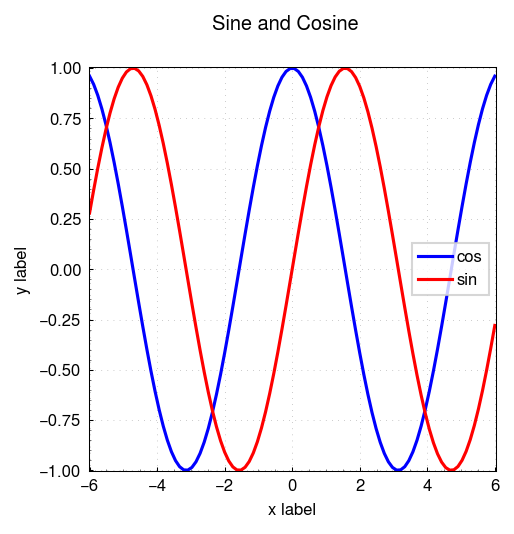

In [9]:
x = np.linspace(-6, 6, 100)
cos = np.cos(x)
sin = np.sin(x)

fig, ax = plt.subplots()

fig.suptitle('Sine and Cosine')
ax.plot(x, cos, color='blue', label='cos')
ax.plot(x, sin, color='red', label='sin')
ax.set_xlabel('x label')
ax.set_ylabel('y label')
ax.legend()

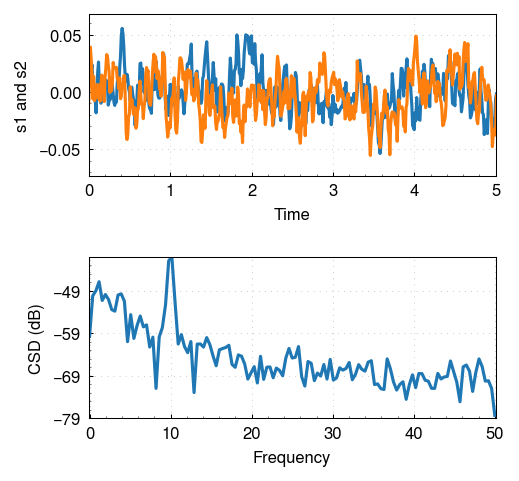

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1)
# make a little extra space between the subplots
fig.subplots_adjust(hspace=0.5)

dt = 0.01
t = np.arange(0, 30, dt)

# Fixing random state for reproducibility
np.random.seed(19680801)


nse1 = np.random.randn(len(t))                 # white noise 1
nse2 = np.random.randn(len(t))                 # white noise 2
r = np.exp(-t / 0.05)

cnse1 = np.convolve(nse1, r, mode='same') * dt   # colored noise 1
cnse2 = np.convolve(nse2, r, mode='same') * dt   # colored noise 2

# two signals with a coherent part and a random part
s1 = 0.01 * np.sin(2 * np.pi * 10 * t) + cnse1
s2 = 0.01 * np.sin(2 * np.pi * 10 * t) + cnse2

ax1.plot(t, s1, t, s2)
ax1.set_xlim(0, 5)
ax1.set_xlabel('Time')
ax1.set_ylabel('s1 and s2')
ax1.grid(True)

cxy, f = ax2.csd(s1, s2, 256, 1. / dt)
ax2.set_ylabel('CSD (dB)')
plt.show()

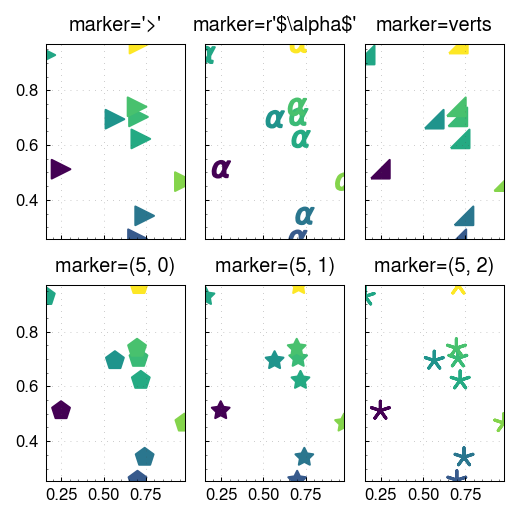

In [11]:
# Fixing random state for reproducibility
np.random.seed(19680801)

x = np.random.rand(10)
y = np.random.rand(10)
z = np.sqrt(x**2 + y**2)

fig, axs = plt.subplots(2, 3, sharex=True, sharey=True)

# marker symbol
axs[0, 0].scatter(x, y, s=80, c=z, marker=">")
axs[0, 0].set_title("marker='>'")

# marker from TeX
axs[0, 1].scatter(x, y, s=80, c=z, marker=r'$\alpha$')
axs[0, 1].set_title(r"marker=r'\$\alpha\$'")

# marker from path
verts = [[-1, -1], [1, -1], [1, 1], [-1, -1]]
axs[0, 2].scatter(x, y, s=80, c=z, marker=verts)
axs[0, 2].set_title("marker=verts")

# regular polygon marker
axs[1, 0].scatter(x, y, s=80, c=z, marker=(5, 0))
axs[1, 0].set_title("marker=(5, 0)")

# regular star marker
axs[1, 1].scatter(x, y, s=80, c=z, marker=(5, 1))
axs[1, 1].set_title("marker=(5, 1)")

# regular asterisk marker
axs[1, 2].scatter(x, y, s=80, c=z, marker=(5, 2))
axs[1, 2].set_title("marker=(5, 2)")

plt.tight_layout()
plt.show()